# Yulu - Case Study

# Problem Statement

- The company wants to know:

    - Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
    - How well those variables describe the electric cycle demands

- Additional Views

    - From inferential statistics, Check the interdependence of features.
    - Predict variables based on climatic conditions of Indian Market

# Installing Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats

# Loading Dataset

In [2]:
yulu = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")

yulu.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
yulu.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

- **`All the features of dataset are continuous except datetime`**

In [4]:
yulu.shape

(10886, 12)

- **`There are 10886 datapoints and 12 features`**

# Checking Null Values

In [5]:
yulu.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

- **`None of the columns contain any null values in the dataset`**

# Checking Duplicate Values

In [6]:
np.any(yulu.duplicated())

False

- **`There is no duplicates values found in our dataset`**

In [7]:
cat_col = ["season", "holiday", "workingday", "weather"]

for i in cat_col:
    yulu[i] = yulu[i].astype("category")
    
yulu["datetime"] = pd.to_datetime(yulu["datetime"])

In [8]:
yulu.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

# Statistical Summary

In [9]:
yulu.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000
count,10886.0,191.574132,181.144454,1.00,42.0000,145.000,284.0000,977.0000


- **`Casual, Registered and Count features might contain outliers.`**<br>
- **`As it can be oberseved from the summary there is significant difference between the mean and median of the above mentioned feature.`**

In [10]:
yulu.describe(include = ["category"]).T

,count,unique,top,freq
season,10886,4,4,2734
holiday,10886,2,0,10575
workingday,10886,2,1,7412
weather,10886,4,1,7192


- **`Winter season is the top season as most of the customers take ride in that season particularily.`**<br>
- **`Most of customer prefer to take ride in Clear, Few clouds and partly cloudy weather.`**

# Lets check the period of data available

In [11]:
yulu["datetime"].min()

Timestamp('2011-01-01 00:00:00')

In [12]:
yulu["datetime"].max()

Timestamp('2012-12-19 23:00:00')

- **` Data is available from 1st Jan 2011 till 19th Dec 2012`**

# Univariate Analysis

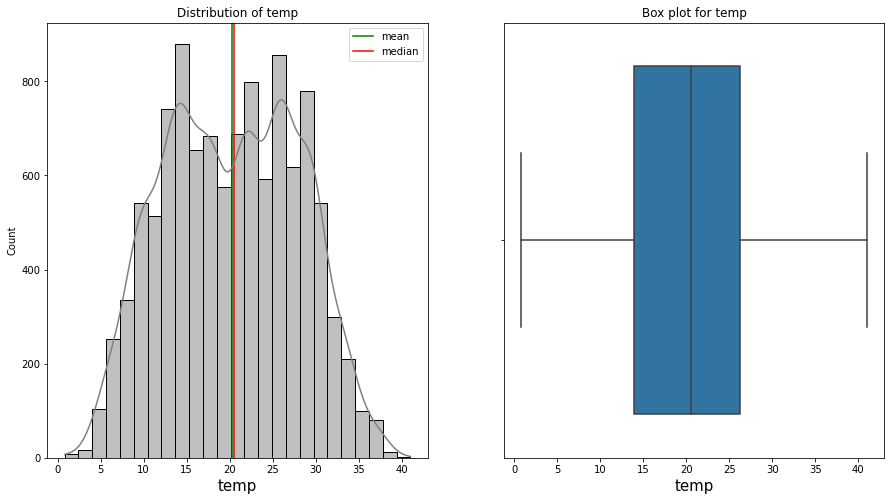

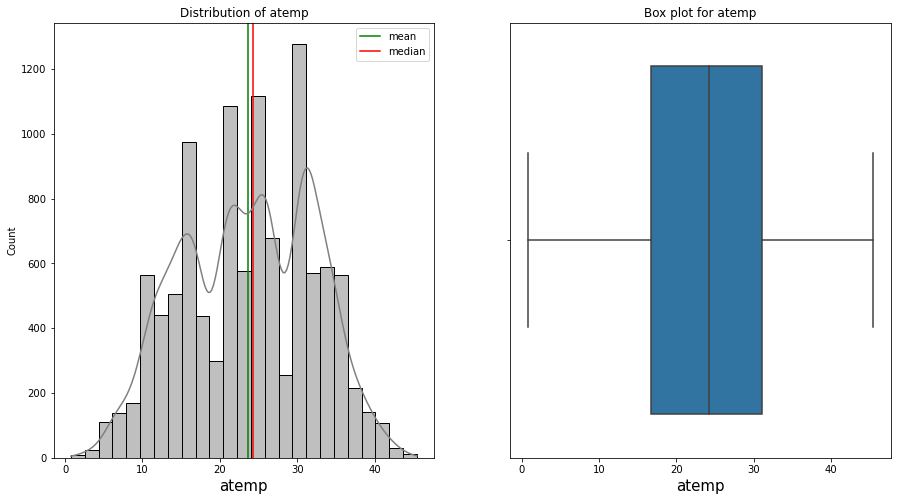

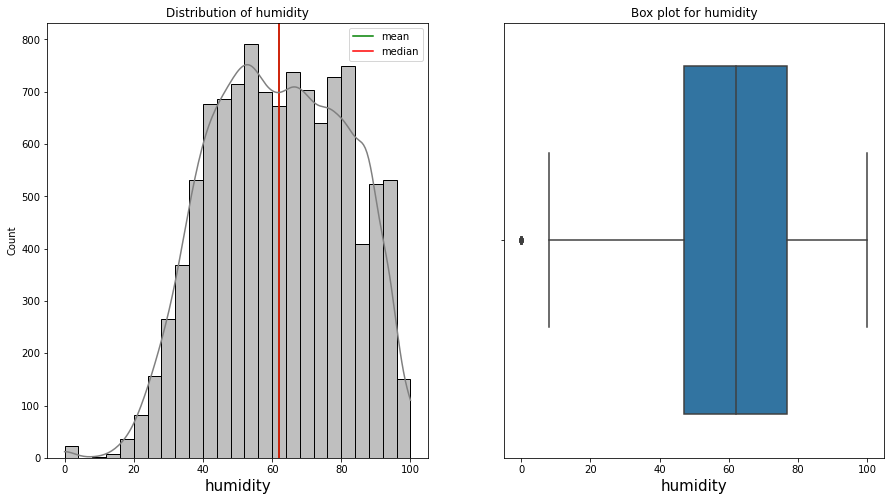

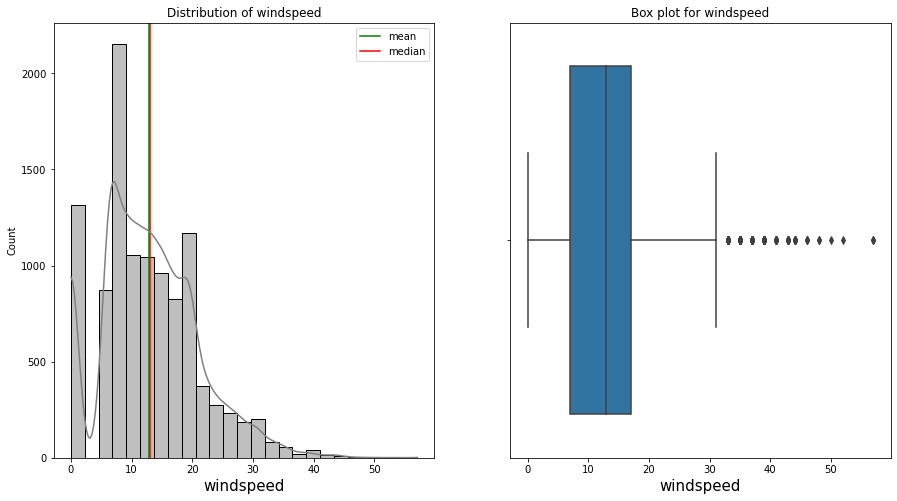

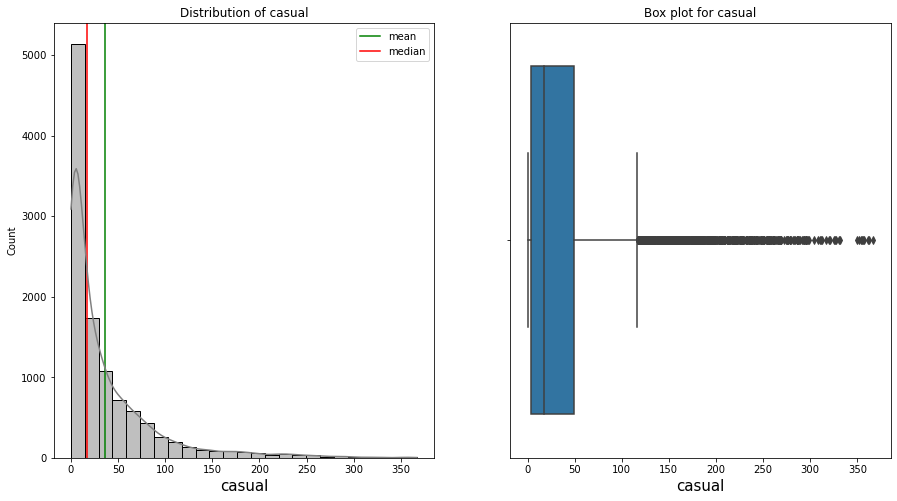

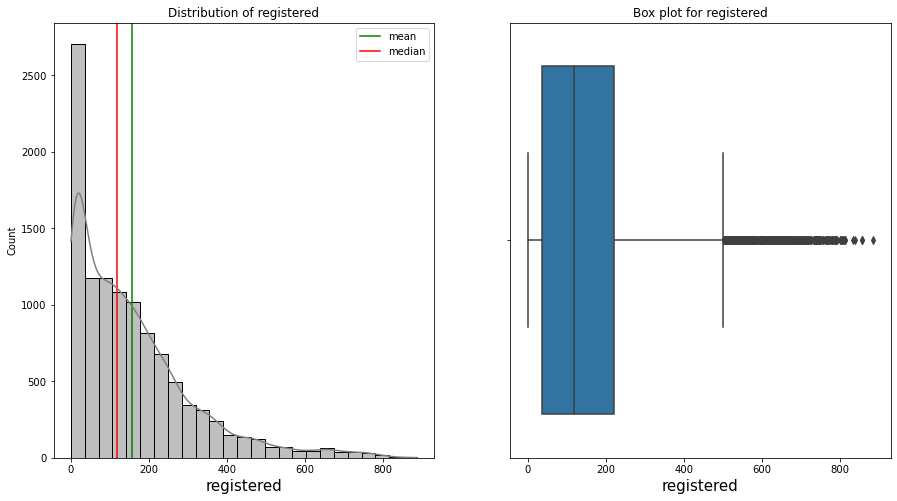

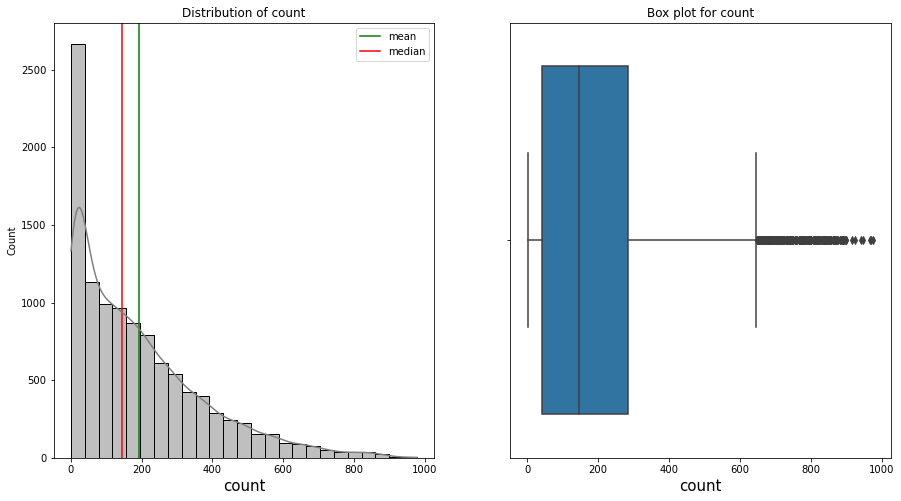

In [13]:
num_cat = ["temp", "atemp", "humidity", "windspeed", "casual", "registered", "count"]

for i in range(len(num_cat)):
    fig = plt.figure(figsize = (15, 8))
    
    ax1 = plt.subplot2grid((1, 2), (0, 0))
    ax1.set_title(f"Distribution of {num_cat[i]}")
    ax1.set_xlabel(ax1.get_xlabel(), fontsize = 15)
    ax1.axvline(yulu[num_cat[i]].mean(),color="green", label = "mean")
    ax1.axvline(yulu[num_cat[i]].median(),color="red", label = "median")
    ax1.legend(loc = "best")
    sns.histplot(data=yulu, x=num_cat[i], ax=ax1, bins=25, kde=True, color="gray")
    
    ax2 = plt.subplot2grid((1, 2), (0, 1))
    ax2.set_title(f"Box plot for {num_cat[i]}")
    ax2.set_xlabel(ax1.get_xlabel(), fontsize = 15)
    sns.boxplot(data = yulu, x=num_cat[i], ax=ax2)
    
plt.show()

**`Insights`**
- **`casual`**, **`registered`** and **`count`** somewhat looks like **`Log Normal Distrinution`**
- **`temp`**, **`atemp`** and **`humidity`** looks like they follows the **`Normal Distribution`**
- **`windspeed`** follows the **`binomial distribution`**
- **`temp`**, **`atemp`**, **`windspeed`** & **`humidity`** don't contain any outliers as there is negligible difference in mean and median.
- Rest of the continous features contain outliers.

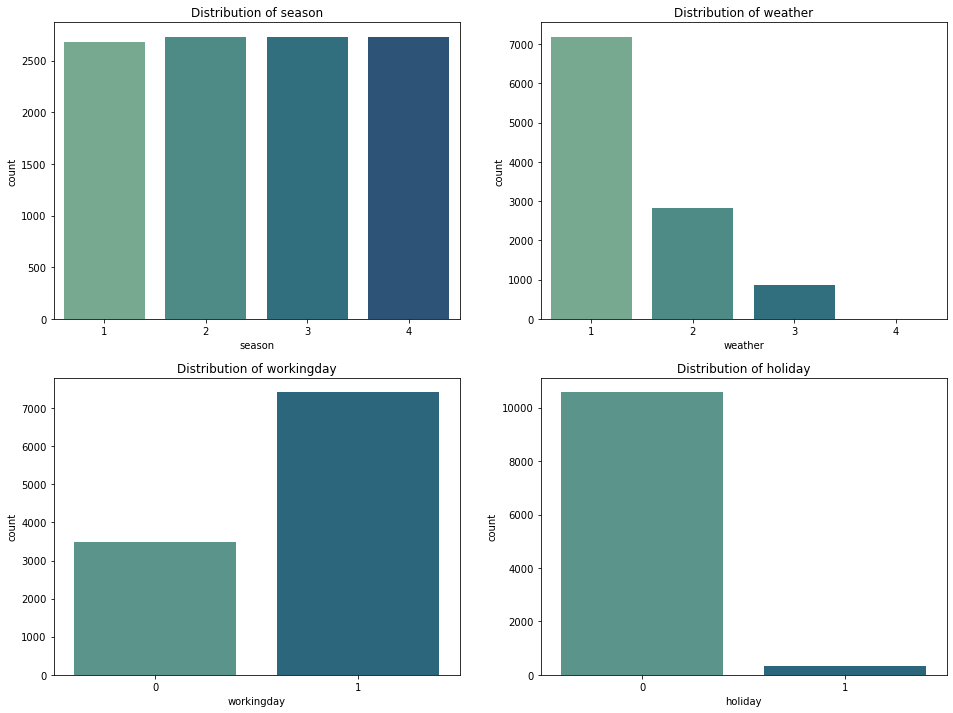

In [14]:
# countplot of each categorical column
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
cat_col = ["season", "weather", "workingday", "holiday"]

index = 0
for row in range(2):
    for col in range(2):
        axis[row, col].set_title(f"Distribution of {cat_col[index]}")
        sns.countplot(data=yulu, x=cat_col[index], ax=axis[row, col], palette="crest")
        index += 1
        
plt.show()

**`Insights`**
- Users book ride in all season equi-probabaly
- There is high demand of electric cycle in Clear, Few clouds, partly cloudy weather.
- There are around 3600 days which falls either on weekend or holiday.
- There is 3% days on which it was holiday.

# Bivariate Analysis

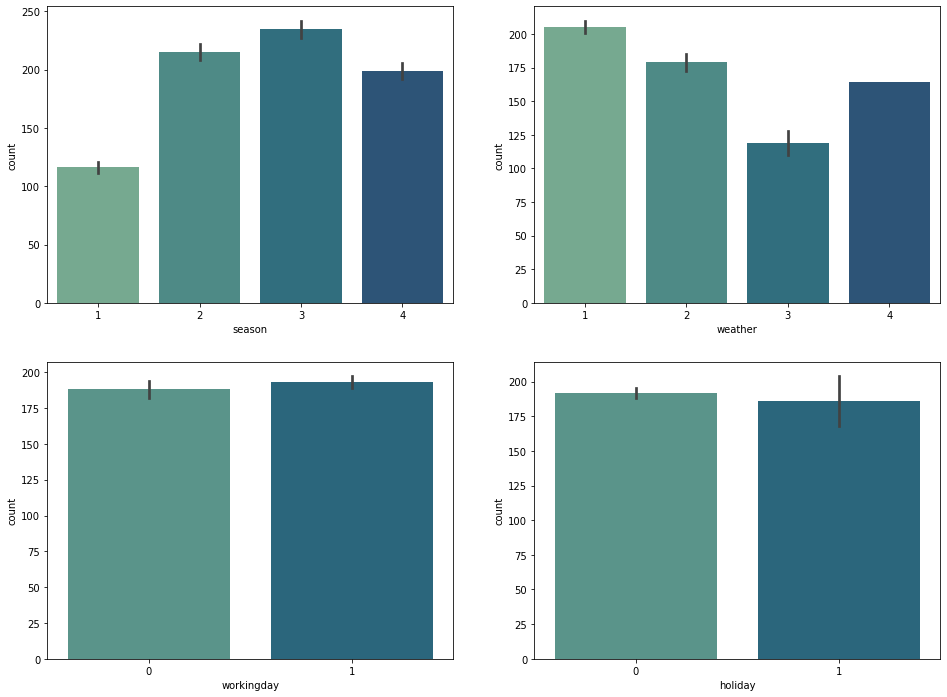

In [15]:
# plotting categorical variables againt count using barplots
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.barplot(data=yulu, x=cat_col[index], y='count', palette= "crest", ax=axis[row, col])
        index += 1
        
plt.show()

**`Insights`**
- In summer and fall seasons more bikes are rented as compared to other seasons.
- Whenever its a holiday more cycles are rented.
- It is also clear from the workingday also that whenever day is holiday or weekend, slightly more cycle were rented.
- Whenever there is rain, thunderstorm, snow or fog, there were less cycle were rented.

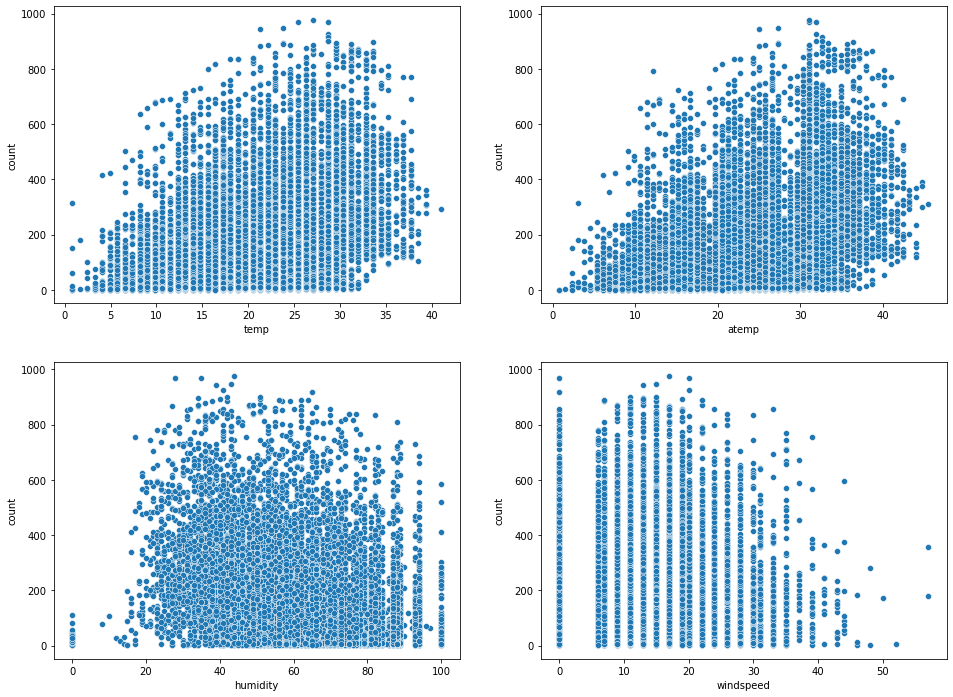

In [16]:
# plotting numerical variables againt count using scatterplot
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.scatterplot(data=yulu, x=num_cat[index], y='count', ax=axis[row, col])
        index += 1
        
plt.show()

**`Insights`**
- Whenever the humidity is less than 20, number of bikes rented is very very low.
- Whenever the temperature is less than 10, number of bikes rented is less.
- Whenever the windspeed is greater than 35, number of bikes rented is less.

# Correlation Analysis

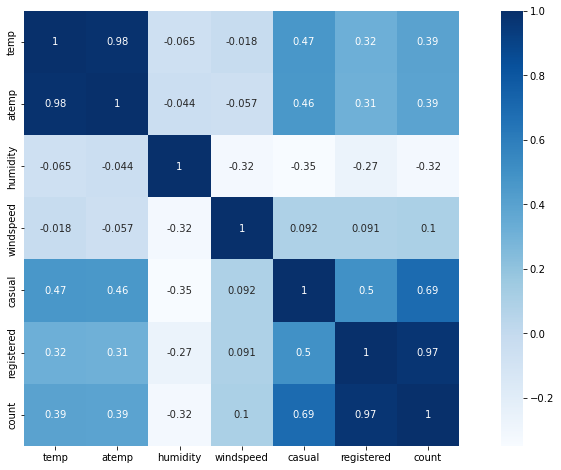

In [17]:
fig = plt.figure(figsize=(15,8))

sns.heatmap(yulu.corr(), cmap="Blues", annot = True, square=True)
plt.show()

**`Insights`**
- registered vs count, casual - count, temp - atemp, casual - registered. These features are highly correlated.

# 2. Hypothesis Testing

# 2.1  Sample T-Test to check if Working Day has an effect on the number of electric cycles rented

### Step1 : Setting up Null and Alternate Hypothesis

- **`Null Hypothesis (Ho)`** : Working day has no effect on electric cycles being rented<br>
- **`Alternate Hypothesis (Ha)`**: Working day has effect on electric cyles being rented

### Step2: Selecting appropriate test

- Here we have two independent samples, we will use ttest_ind as it will be our two-tailed test.

### Step3: Choosing Significance level

- **`Significance level (alpha)`** : 0.05

### Step 4: Collect and Prepare Data

In [20]:
working_zero = yulu.loc[yulu["workingday"] == 0]["count"].values
working_one = yulu.loc[yulu["workingday"] == 1]["count"].values


- Lets check the variance of two dataset

In [21]:
np.var(working_zero)

30171.346098942427

In [22]:
np.var(working_one)

34040.69710674686

- The ratio of larger group to smaller group is less than 4:1. So we consider it as equi-variance

### Lets verify this using histogram

<AxesSubplot:xlabel='count', ylabel='Count'>

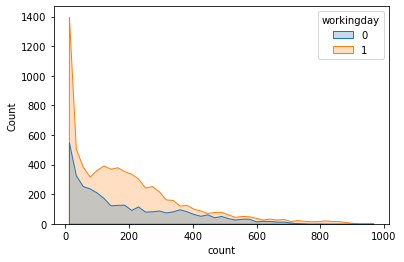

In [31]:
sns.histplot(data = yulu, x = "count", hue = "workingday", element="poly")

In [26]:
test_statistics, pvalue = stats.ttest_ind(a=working_one, b=working_zero, equal_var=True, alternative="two-sided")

In [28]:
print(f"Test Statistics: {test_statistics} \npvalue: {pvalue}")

Test Statistics: 1.2096277376026694 
pvalue: 0.22644804226361348


### Step5: Taking Decision

In [29]:
if pvalue < 0.05:
    print("Reject Null Hypothesis (Ho)")
else:
    print("Fail to reject null hypothesis")

Fail to reject null hypothesis


### Step6: Inference

- **`Since pvalue is greater than 0.05 so we can not reject the Null hypothesis. `**
- **`We don't have the sufficient evidence to say that working day has effect on the number of cycles being rented.`**

# 2.2 `ANNOVA` to check if No. of cycles rented is similar or different in different <br> 1. `weather` <br> 2. `season`

### Step1 : Setting up Null and Alternate Hypothesis

- **`Null Hypothesis (Ho)`** : Number of cycles rented is similar in different weather and season.<br>
- **`Alternate Hypothesis (Ha)`**: Number of cycles rented is not similar in different weather and season.

### Step2: Selecting Test

- **`Here we will using ANNOVA to test the hypothesis defined above`**

### Step3: Choosing Significance level

- **`Significance Level (alpha):`** 0.05

### Step4: Conduct and prepare test

In [37]:
# defining the data groups for the ANOVA

w1 = yulu[yulu['weather']==1]['count'].values
w2 = yulu[yulu['weather']==2]['count'].values
w3 = yulu[yulu['weather']==3]['count'].values
w4 = yulu[yulu['weather']==4]['count'].values

s5 = yulu[yulu['season']==1]['count'].values
s6 = yulu[yulu['season']==2]['count'].values
s7 = yulu[yulu['season']==3]['count'].values
s8 = yulu[yulu['season']==4]['count'].values

# conduct the one-way anova
t_stat, pvalue = stats.f_oneway(w1, w2, w3, w4, s5, s6, s7, s8)

In [39]:
print(f"Test Statistics: {t_stat}\npvalue: {pvalue}")

Test Statistics: 127.96661249562491
pvalue: 2.8074771742434642e-185


### Step5: Taking Decision

In [40]:
if pvalue < 0.05:
    print("Reject null hypothesis (Ho)")
else:
    print("Fail to reject null hypothesis (Ha)")

Reject null hypothesis (Ho)


### Step6: Inference

- **`Since p-value is less than 0.05, we reject the null hypothesis. `**
- **`This implies that Number of cycles rented is not similar in different weather and season conditions`**

# 2.3 Chi-square test to check if Weather is dependent on the season

### Step1 : Setting up Null and Alternate Hypothesis

- **`Null Hypothesis (Ho)`** : Weather is independent of the season.<br>
- **`Alternate Hypothesis (Ha)`**: Weather is not independent of the season.

### Step2: Selecting Test

- **`We will use chi-square test to test hypyothesis defined above.`**

### Step3: Choosing Significance level

- **`Significance Level (alpha):`** 0.05

### Step4: Conduct and prepare test

In [44]:
# Lets create contigency table
season_weather = pd.crosstab(yulu["season"], yulu["weather"])
season_weather

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [50]:
# Lets calculate expected value
chi_stat, p_value, dof, expected = stats.chi2_contingency(season_weather)

print("1. Chi_Stat : ", chi_stat)
print("2. p_value : ", p_value)
print("3. Degree of Freedom : ", dof)
print("4. Expected : ", expected)

1. Chi_Stat :  49.158655596893624
2. p_value :  1.549925073686492e-07
3. Degree of Freedom :  9
4. Expected :  [[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]


### Step5: Taking Decision

In [56]:
critical_val = stats.chi2.ppf(q=1-.05, df=dof)
print(f"critical value: {critical_val}")

if p_val <= .05:
    print("\nSince p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that\
    Weather is dependent on the season.")
else:
    print("Since p-value is greater than the alpha 0.05, We do not reject the Null Hypothesis")

critical value: 16.918977604620448

Since p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that    Weather is dependent on the season.


# Step6: Inference

- **`Weather is dependent on the season`**

# Inferences Related to All Hypothesis Testing Conducted

- We don't have the sufficient evidence to say that working day has effect on the number of cycles being rented.
- Number of cycles rented is not similar in different weather and season conditions
- Weather is dependent on the season.

# Insights Based on EDA

- In summer and fall seasons more bikes are rented as compared to other seasons.
- Whenever its a holiday more bikes are rented.
- It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
- Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.
- Whenever the humidity is less than 20, number of bikes rented is very very low.
- Whenever the temperature is less than 10, number of bikes rented is less.
- Whenever the windspeed is greater than 35, number of bikes rented is less.

# Recommendations

- In summer and fall seasons the company should have more bikes in stock to be rented. Because the demand in these seasons is higher as compared to other seasons.
- With a significance level of 0.05, workingday has no effect on the number of bikes being rented.
- In very low humid days, company should have less bikes in the stock to be rented.
- Whenever temprature is less than 10 or in very cold days, company should have less bikes.
- Whenever the windspeed is greater than 35 or in thunderstorms, company should have less bikes in stock to be rented.